# Image Augmentation
**GitHub:** https://github.com/aleju/imgaug

```python
import imgaug.augmenters as iaa
import imgaug as ia
```


In [1]:
import imgaug.augmenters as iaa
import imgaug as ia

https://github.com/aleju/imgaug#list_of_augmenters

__**flip:**__

| Augmenter | Description |
| :--- | :--- |
| Fliplr(P) | Horizontally flips images with probability `P`. |
| Flipud(P) | Vertically flips images with probability `P`. |

**geometric:**

| Augmenter | Description |
| :--- | :--- |
| Affine(S, TPX, TPC, R, SH, O, CVAL, FO, M, B) | Applies affine transformations to images. Scales them by `S` (>1=zoom in, <1=zoom out), translates them by `TPX` pixels or `TPC` percent, rotates them by `R` degrees and shears them by `SH` degrees. Interpolation happens with order `O` (0 or 1 are good and fast). If `FO` is true, the output image plane size will be fitted to the distorted image size, i.e. images rotated by 45deg will not be partially outside of the image plane. `M` controls how to handle pixels in the output image plane that have no correspondence in the input image plane. If `M='constant'` then `CVAL` defines a constant value with which to fill these pixels. `B` allows to set the backend framework (currently `cv2` or `skimage`). |
| AffineCv2(S, TPX, TPC, R, SH, O, CVAL, M, B) | Same as Affine, but uses only `cv2` as its backend. Currently does not support `FO=true`. Might be deprecated in the future. |



In [2]:
seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    iaa.Affine(
        rotate=(-45, 45),
        mode=ia.ALL, # edge, reflect, symmetric, warp, constant
        shear=(-16,16)
    )
])

In [3]:
img_path = 'lenna.png'

```python
img = cv2.imread(img_path)[height,width,BGR]
```

* 「cv2.imread」返回的圖片變數會以多維陣列形式表示: 
    * 第一維:圖片的高
    * 第二維:圖片的寬
    * 第三維:色彩空間的各個值(灰階沒有第三維)

* 返回的多維陣列是numpy函式庫的類型，所以可以透過 「shape」屬性取得維度大小，譬如:
    * image.shape[0] => 取得圖片高
    * image.shape[1] => 取得圖片寬
    * image.shape[2] => 取得當前色彩空間的通道數量


Height: 512 pixels
Width: 512 pixels
Color: 3 channels


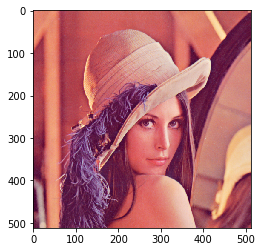

In [5]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(img_path)[:,:,::-1] # reverse channel
# print(img)
print('Height: {} pixels'.format(img.shape[0]))
print('Width: {} pixels'.format(img.shape[1]))
print('Color: {} channels'.format(img.shape[2]))
plt.imshow(img)

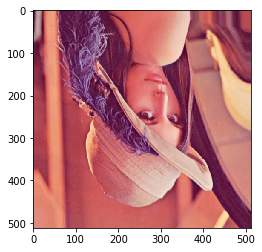

In [8]:
img_aug = seq.augment_image(img)
plt.imshow(img_aug)